### Importing libraries and loading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from datetime import datetime, timedelta
from pytrends.request import TrendReq
import functools
import operator

In [2]:
df = pd.read_csv('amc.csv')
df.fillna(0,inplace=True)
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,11/11/2021,$39.46,30474070,$38,$40.2,$37.5
1,11/10/2021,$38.29,32463560,$38.79,$40.8691,$38.05
2,11/09/2021,$39.93,37893480,$42.43,$42.6,$39.25
3,11/08/2021,$45.06,70347850,$42.48,$45.95,$41.77
4,11/05/2021,$41.7,40076990,$41.16,$41.97,$39.93


### making sure that our data is actually recognized as such (and not just a string), so we convert the `date` column


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

#### Giving in the required date range to the Date column of Dataframe `df`

In [4]:
new_df = df[(df['Date'] <= datetime(2021,9,30)) & (df['Date'] >= datetime(2021,1,4))]
new_df.head()

,Date,Close/Last,Volume,Open,High,Low
30,2021-09-30,$38.06,102819800,$35.19,$41.78,$33.74
31,2021-09-29,$35.54,43007780,$37.25,$38.26,$35.37
32,2021-09-28,$36.99,39523310,$38.9,$39.13,$36.88
33,2021-09-27,$39.3,31225530,$40.12,$40.63,$39.21
34,2021-09-24,$40.01,32555860,$39.81,$40.52,$39.25


#### Changing name of `Date` column to ease merging

In [5]:
new_df = new_df.rename({'Date' : 'date'}, axis=1) 
new_df.head()

,date,Close/Last,Volume,Open,High,Low
30,2021-09-30,$38.06,102819800,$35.19,$41.78,$33.74
31,2021-09-29,$35.54,43007780,$37.25,$38.26,$35.37
32,2021-09-28,$36.99,39523310,$38.9,$39.13,$36.88
33,2021-09-27,$39.3,31225530,$40.12,$40.63,$39.21
34,2021-09-24,$40.01,32555860,$39.81,$40.52,$39.25


#### Reversing the Dataframe from Bottom to top using `Slicing`

In [6]:
new_df.iloc[::-1]

,date,Close/Last,Volume,Open,High,Low
217,2021-01-04,$2.01,29873800,$2.2,$2.2,$2
216,2021-01-05,$1.98,28148310,$1.99,$2.03,$1.91
215,2021-01-06,$2.01,67363340,$2.03,$2.23,$1.97
214,2021-01-07,$2.05,26150490,$2.08,$2.11,$2.02
213,2021-01-08,$2.14,39553340,$2.09,$2.211,$2.07
...,...,...,...,...,...,...
34,2021-09-24,$40.01,32555860,$39.81,$40.52,$39.25
33,2021-09-27,$39.3,31225530,$40.12,$40.63,$39.21
32,2021-09-28,$36.99,39523310,$38.9,$39.13,$36.88
31,2021-09-29,$35.54,43007780,$37.25,$38.26,$35.37


## Using Google Trends

In [7]:
pytrend = TrendReq()
pytrend.build_payload(kw_list = ["amc"],timeframe='2021-01-04 2021-09-30', geo="US")
amc_trends = pytrend.interest_over_time()
amc_trends

,amc,isPartial
date,,
2021-01-04,3,False
2021-01-05,3,False
2021-01-06,2,False
2021-01-07,2,False
2021-01-08,3,False
...,...,...
2021-09-26,6,False
2021-09-27,7,False
2021-09-28,8,False


In [8]:
amc_trends = pd.DataFrame(data = {'date': amc_trends.index.tolist(), 'search': amc_trends["amc"].tolist()})
amc_trends

,date,search
0,2021-01-04,3
1,2021-01-05,3
2,2021-01-06,2
3,2021-01-07,2
4,2021-01-08,3
...,...,...
265,2021-09-26,6
266,2021-09-27,7
267,2021-09-28,8
268,2021-09-29,7


### Scatter plot showing Number of Daily searches

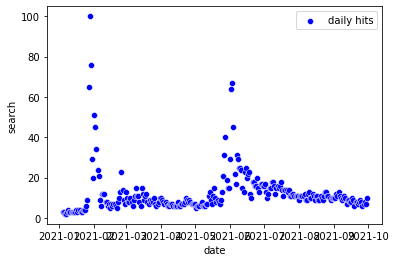

In [9]:
sns.scatterplot( x = 'date',
             y = 'search',
             data = amc_trends,
             label = 'daily hits', color="blue")
plt.show()

### Scatterplot representing comparison between `Daily Hits` and `Rolling Average`

   #### Looking at the plot below, we can definitely see higher search results for the time period of increased stock price


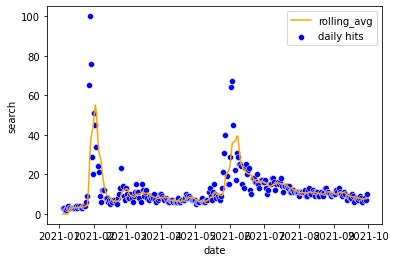

In [10]:
amc_trends['rolling_avg' ] = amc_trends.search.rolling(7).mean()
amc_trends = amc_trends.fillna(0)
sns.scatterplot( x = 'date',
             y = 'search',
             data = amc_trends,
             label = 'daily hits', color="blue")
sns.lineplot( x = 'date',
             y = 'rolling_avg',
             data = amc_trends,
             label = 'rolling_avg', color="orange")
plt.show()

### Merging datasets to look for increased awareness around `amc` with number of searches around the same period as the stock price goes up 

In [11]:
combined_df = pd.merge(new_df,amc_trends, on="date")
combined_df

,date,Close/Last,Volume,Open,High,Low,search,rolling_avg
0,2021-09-30,$38.06,102819800,$35.19,$41.78,$33.74,10,7.857143
1,2021-09-29,$35.54,43007780,$37.25,$38.26,$35.37,7,7.571429
2,2021-09-28,$36.99,39523310,$38.9,$39.13,$36.88,8,7.571429
3,2021-09-27,$39.3,31225530,$40.12,$40.63,$39.21,7,7.571429
4,2021-09-24,$40.01,32555860,$39.81,$40.52,$39.25,9,7.857143
...,...,...,...,...,...,...,...,...
183,2021-01-08,$2.14,39553340,$2.09,$2.211,$2.07,3,0.000000
184,2021-01-07,$2.05,26150490,$2.08,$2.11,$2.02,2,0.000000
185,2021-01-06,$2.01,67363340,$2.03,$2.23,$1.97,2,0.000000
186,2021-01-05,$1.98,28148310,$1.99,$2.03,$1.91,3,0.000000


## Using Reddit API

## We believe that Reddit played a major role in the sudden rise in the stock price of amc

In [12]:
import praw
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [13]:
reddit = praw.Reddit(
            client_id = '_2lvb9hjjuDH2vT9UCj8EQ',
            client_secret = 'X5TzGZ6aViUT64qwSGPWiDcEBUE95A',
            user_agent = 'using for my school project (by /u/EquivalentPeach879)',
            username = 'EquivalentPeach879 ',
            password = 'Aurang98')

Version 7.4.0 of praw is outdated. Version 7.5.0 was released 1 day ago.


### Looking at all subreddits that contain "amc" in the title post for this year

In [14]:
post_year_df = pd.DataFrame()
params = {}
for i in range(3):
    posts = reddit.subreddit("amc").search("amc",sort="hot",time_filter="year",params=params)
    add_post_df = pd.DataFrame()
    count = 0
    for post in posts:
        count += 1
        add_post_df = add_post_df.append({
                'subreddit': post.subreddit.title,
                'title': post.title,
                'text': post.selftext,
                'upvote_ratio': post.upvote_ratio,
                'score': post.score,
                'img_link': post.url,
                'created_utc': post.created_utc,
                'fullname': post.fullname,
                'num_comments':post.num_comments
            }, ignore_index=True)
    post_year_df = post_year_df.append(add_post_df, ignore_index=True)
    print("Added " + str(count) + " posts")
    params['after'] = post_year_df.iloc[len(post_year_df)-1]['fullname']
post_year_df

Added 100 posts
Added 100 posts
Added 50 posts


,subreddit,title,text,upvote_ratio,score,img_link,created_utc,fullname,num_comments
0,A home for American Motors enthusiasts,Thinking about buying an AMC Eagle,While looking at station wagons on marketplace...,1.00,1.0,https://www.reddit.com/r/amc/comments/qu3bca/t...,1.636935e+09,t3_qu3bca,0.0
1,A home for American Motors enthusiasts,Feedback on customized dashboard- 59 Rambler,,1.00,20.0,https://i.redd.it/706wzkak3az71.jpg,1.636773e+09,t3_qsrviq,2.0
2,A home for American Motors enthusiasts,66 Ambassador DLP 327 4bbl,,0.99,61.0,https://i.redd.it/zqhss4prs5z71.jpg,1.636720e+09,t3_qsa8s8,4.0
3,A home for American Motors enthusiasts,Bought an 02 Freightliner Classic. This the ke...,,1.00,45.0,https://i.redd.it/z8myggftmzy71.jpg,1.636646e+09,t3_qro696,4.0
4,A home for American Motors enthusiasts,Really proud of my little bro. His AMX went fr...,,0.97,57.0,https://i.redd.it/nlk02rfavsx71.jpg,1.636128e+09,t3_qne9cv,2.0
...,...,...,...,...,...,...,...,...,...
245,A home for American Motors enthusiasts,Sorry the delay for the removal of the WSB Spa...,"Since I´m the regular Mod here, and I´m geman,...",0.95,162.0,https://www.reddit.com/r/amc/comments/l615l8/s...,1.611741e+09,t3_l615l8,47.0
246,A home for American Motors enthusiasts,"THIS IS A CAR SUBREDDIT, NOT A STOCK MARKET SU...",[deleted],0.94,435.0,https://www.reddit.com/r/amc/comments/l5xfuo/t...,1.611726e+09,t3_l5xfuo,95.0
247,A home for American Motors enthusiasts,Tired of the stock market posts. Here's my 197...,,0.95,112.0,https://i.imgur.com/KKcyrvY.jpg,1.611727e+09,t3_l5xtsx,16.0
248,A home for American Motors enthusiasts,Just picked up this 67.,,0.96,69.0,https://i.imgur.com/WAA8hVR.jpg,1.611690e+09,t3_l5lwc0,10.0


### Converting time to `normal` format

In [29]:
post_year_df['created_utc'] = pd.to_datetime(post_year_df['created_utc'], unit='s')

In [30]:
post_year_df

,subreddit,title,text,upvote_ratio,score,img_link,created_utc,fullname,num_comments
0,A home for American Motors enthusiasts,Thinking about buying an AMC Eagle,While looking at station wagons on marketplace...,1.00,1.0,https://www.reddit.com/r/amc/comments/qu3bca/t...,2021-11-15 00:13:52,t3_qu3bca,0.0
1,A home for American Motors enthusiasts,Feedback on customized dashboard- 59 Rambler,,1.00,20.0,https://i.redd.it/706wzkak3az71.jpg,2021-11-13 03:06:09,t3_qsrviq,2.0
2,A home for American Motors enthusiasts,66 Ambassador DLP 327 4bbl,,0.99,61.0,https://i.redd.it/zqhss4prs5z71.jpg,2021-11-12 12:34:40,t3_qsa8s8,4.0
3,A home for American Motors enthusiasts,Bought an 02 Freightliner Classic. This the ke...,,1.00,45.0,https://i.redd.it/z8myggftmzy71.jpg,2021-11-11 15:50:32,t3_qro696,4.0
4,A home for American Motors enthusiasts,Really proud of my little bro. His AMX went fr...,,0.97,57.0,https://i.redd.it/nlk02rfavsx71.jpg,2021-11-05 16:01:24,t3_qne9cv,2.0
...,...,...,...,...,...,...,...,...,...
245,A home for American Motors enthusiasts,Sorry the delay for the removal of the WSB Spa...,"Since I´m the regular Mod here, and I´m geman,...",0.95,162.0,https://www.reddit.com/r/amc/comments/l615l8/s...,2021-01-27 09:49:33,t3_l615l8,47.0
246,A home for American Motors enthusiasts,"THIS IS A CAR SUBREDDIT, NOT A STOCK MARKET SU...",[deleted],0.94,435.0,https://www.reddit.com/r/amc/comments/l5xfuo/t...,2021-01-27 05:36:28,t3_l5xfuo,95.0
247,A home for American Motors enthusiasts,Tired of the stock market posts. Here's my 197...,,0.95,112.0,https://i.imgur.com/KKcyrvY.jpg,2021-01-27 06:01:49,t3_l5xtsx,16.0
248,A home for American Motors enthusiasts,Just picked up this 67.,,0.96,69.0,https://i.imgur.com/WAA8hVR.jpg,2021-01-26 19:46:57,t3_l5lwc0,10.0


### 1. Seperating `Date` and `Time` From `created_utc` column of `post_year_df`
### 2. Removing unwanted dates from the `Date` column of `post_year_df` to match it with the Date column of `combined_df`

In [31]:
post_year_df['Date'] = pd.to_datetime(post_year_df['created_utc']).dt.date
post_year_df['Time'] = pd.to_datetime(post_year_df['created_utc']).dt.time
post_year_df['Date'] = pd.to_datetime(post_year_df['Date'], format='%Y-%m-%d')
post_new = post_year_df[~(post_year_df['Date'] >= '2021-09-30')]
post_new

,subreddit,title,text,upvote_ratio,score,img_link,created_utc,fullname,num_comments,Date,Time
27,A home for American Motors enthusiasts,I6 intake swap,I have a chance to get an Eagle with a 4.2L I6...,0.80,3.0,https://www.reddit.com/r/amc/comments/py3c67/i...,2021-09-29 19:58:25,t3_py3c67,5.0,2021-09-29,19:58:25
28,A home for American Motors enthusiasts,Does this geometry look right? 68 AMX,,1.00,15.0,https://i.redd.it/7u08uifb8qp71.jpg,2021-09-25 22:36:01,t3_pvh4xt,12.0,2021-09-25,22:36:01
29,A home for American Motors enthusiasts,How Much AMC Javelin Is Worth ?,,0.96,26.0,https://www.spicydrive.com/2021/02/How-Much-AM...,2021-09-17 18:12:56,t3_pq5icn,7.0,2021-09-17,18:12:56
30,A home for American Motors enthusiasts,My 62 Rambler Classic,,1.00,63.0,https://www.reddit.com/gallery/ptbdm0,2021-09-22 16:35:55,t3_ptbdm0,5.0,2021-09-22,16:35:55
31,A home for American Motors enthusiasts,71 sst,i'm trying to help a friend of mine find a rep...,1.00,2.0,https://www.reddit.com/r/amc/comments/psyaxb/7...,2021-09-22 02:48:29,t3_psyaxb,3.0,2021-09-22,02:48:29
...,...,...,...,...,...,...,...,...,...,...,...
245,A home for American Motors enthusiasts,Sorry the delay for the removal of the WSB Spa...,"Since I´m the regular Mod here, and I´m geman,...",0.95,162.0,https://www.reddit.com/r/amc/comments/l615l8/s...,2021-01-27 09:49:33,t3_l615l8,47.0,2021-01-27,09:49:33
246,A home for American Motors enthusiasts,"THIS IS A CAR SUBREDDIT, NOT A STOCK MARKET SU...",[deleted],0.94,435.0,https://www.reddit.com/r/amc/comments/l5xfuo/t...,2021-01-27 05:36:28,t3_l5xfuo,95.0,2021-01-27,05:36:28
247,A home for American Motors enthusiasts,Tired of the stock market posts. Here's my 197...,,0.95,112.0,https://i.imgur.com/KKcyrvY.jpg,2021-01-27 06:01:49,t3_l5xtsx,16.0,2021-01-27,06:01:49
248,A home for American Motors enthusiasts,Just picked up this 67.,,0.96,69.0,https://i.imgur.com/WAA8hVR.jpg,2021-01-26 19:46:57,t3_l5lwc0,10.0,2021-01-26,19:46:57


## Removing unwanted columns using .drop function

In [32]:
post_new1 = post_new.drop(['created_utc', 'img_link', 'fullname','subreddit', 'text'], axis=1)


### Merging Data scraped from Reddit and Google trends using `.merge` function keeping date as the common reference 

In [33]:
merged_df = pd.merge(left=combined_df, right=post_new1,left_on='date', right_on='Date')


### Moving the `Date` and `Time` columns to the front 

In [34]:
to_first = merged_df.pop('Date')
to_second = merged_df.pop('Time')
merged_df.insert(0,'Date',to_first)
merged_df.insert(1,'Time',to_second)


In [35]:
merged_df.drop('date',axis=1)

,Date,Time,Close/Last,Volume,Open,High,Low,search,rolling_avg,title,upvote_ratio,score,num_comments
0,2021-09-29,19:58:25,$35.54,43007780,$37.25,$38.26,$35.37,7,7.571429,I6 intake swap,0.80,3.0,5.0
1,2021-09-22,16:35:55,$40.08,52441280,$38.5,$40.57,$37.74,7,8.000000,My 62 Rambler Classic,1.00,63.0,5.0
2,2021-09-22,02:48:29,$40.08,52441280,$38.5,$40.57,$37.74,7,8.000000,71 sst,1.00,2.0,3.0
3,2021-09-20,08:05:19,$40.29,70807630,$41.95,$43.3286,$38.53,8,8.285714,1967 Rambler Rebel SST parts,1.00,12.0,4.0
4,2021-09-17,18:12:56,$44.2,68730250,$46.1,$46.38,$44.2,10,8.714286,How Much AMC Javelin Is Worth ?,0.96,26.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2021-01-27,06:01:49,$19.9,1253254000,$20.34,$20.36,$11.01,65,13.571429,Tired of the stock market posts. Here's my 197...,0.95,112.0,16.0
158,2021-01-26,19:46:57,$4.96,456850200,$5.09,$5.19,$4.37,9,4.714286,Just picked up this 67.,0.96,69.0,10.0
159,2021-01-25,16:03:12,$4.42,443238100,$4.71,$4.88,$3.85,6,4.000000,I wish AMC were still alive today.. Detroit wa...,0.99,73.0,20.0
160,2021-01-25,22:36:52,$4.42,443238100,$4.71,$4.88,$3.85,6,4.000000,Ive found ANOTHER Gremlin. Guy loves AMCs want...,0.86,10.0,2.0


# Posting comments under Wallstreetbets posts with `"amc"` in the title 

### This section can be interesting to look at for further text analysis, to see how the discussions among people affected the stock price

In [ ]:
for post in reddit.subreddit("wallstreetbets").search("amc", limit=None):
    post.comments.replace_more(limit=None)
    comment_queue = post.comments[:]
    while len(comment_queue) > 0:
        comment = comment_queue.pop(0)
        print(comment.body)
        comment_queue.extend(comment.replies)
    print('-----------')


**User Report**| | | |
:--|:--|:--|:--
**Total Submissions**|5|**First Seen In WSB**|9 months ago
**Total Comments**|16|**Previous DD**|
**Account Age**|1 year|[^scan ^comment ](https://www.reddit.com/message/compose/?to=VisualMod&subject=scan_comment&message=Replace%20this%20text%20with%20a%20comment%20ID%20(which%20looks%20like%20*h26cq3k*)%20to%20have%20the%20bot%20scan%20your%20comment%20and%20correct%20your%20first%20seen%20date.)|[^scan ^submission ](https://www.reddit.com/message/compose/?to=VisualMod&subject=scan_submission&message=Replace%20this%20text%20with%20a%20submission%20ID%20(which%20looks%20like%20*h26cq3k*)%20to%20have%20the%20bot%20scan%20your%20submission%20and%20correct%20your%20first%20seen%20date.)
**Vote Spam (NEW)**|[Click to Vote](https://www.reddit.com/message/compose/?to=VisualMod&subject=vote_spam&message=qk6f97)|**Vote Approve (NEW)**|[Click to Vote](https://www.reddit.com/message/compose/?to=VisualMod&subject=vote_approve&message=qk6f97)
Triangles, squa


**User Report**| | | |
:--|:--|:--|:--
**Total Submissions**|16|**First Seen In WSB**|8 months ago
**Total Comments**|6|**Previous DD**|[x](https://www.reddit.com/r/wallstreetbets/comments/qkim2u/state_of_affairs_deep_dd_dive_into_gme_and_amc/) [x](https://www.reddit.com/r/wallstreetbets/comments/mhzzq9/gme_be_prepared_for_an_increase_in_volume_any/) 
**Account Age**|5 years|[^scan ^comment ](https://www.reddit.com/message/compose/?to=VisualMod&subject=scan_comment&message=Replace%20this%20text%20with%20a%20comment%20ID%20(which%20looks%20like%20*h26cq3k*)%20to%20have%20the%20bot%20scan%20your%20comment%20and%20correct%20your%20first%20seen%20date.)|[^scan ^submission ](https://www.reddit.com/message/compose/?to=VisualMod&subject=scan_submission&message=Replace%20this%20text%20with%20a%20submission%20ID%20(which%20looks%20like%20*h26cq3k*)%20to%20have%20the%20bot%20scan%20your%20submission%20and%20correct%20your%20first%20seen%20date.)
**Vote Spam (NEW)**|[Click to Vote](https://www.r


**User Report**| | | |
:--|:--|:--|:--
**Total Submissions**|2|**First Seen In WSB**|8 months ago
**Total Comments**|1|**Previous DD**|
**Account Age**|10 months|[^scan ^comment ](https://www.reddit.com/message/compose/?to=VisualMod&subject=scan_comment&message=Replace%20this%20text%20with%20a%20comment%20ID%20(which%20looks%20like%20*h26cq3k*)%20to%20have%20the%20bot%20scan%20your%20comment%20and%20correct%20your%20first%20seen%20date.)|[^scan ^submission ](https://www.reddit.com/message/compose/?to=VisualMod&subject=scan_submission&message=Replace%20this%20text%20with%20a%20submission%20ID%20(which%20looks%20like%20*h26cq3k*)%20to%20have%20the%20bot%20scan%20your%20submission%20and%20correct%20your%20first%20seen%20date.)
**Vote Spam (NEW)**|[Click to Vote](https://www.reddit.com/message/compose/?to=VisualMod&subject=vote_spam&message=q68b7r)|**Vote Approve (NEW)**|[Click to Vote](https://www.reddit.com/message/compose/?to=VisualMod&subject=vote_approve&message=q68b7r)
When you thin


**User Report**| | | |
:--|:--|:--|:--
**Total Submissions**|2|**First Seen In WSB**|8 months ago
**Total Comments**|7|**Previous DD**|
**Account Age**|9 years|[^scan ^comment ](https://www.reddit.com/message/compose/?to=VisualMod&subject=scan_comment&message=Replace%20this%20text%20with%20a%20comment%20ID%20(which%20looks%20like%20*h26cq3k*)%20to%20have%20the%20bot%20scan%20your%20comment%20and%20correct%20your%20first%20seen%20date.)|[^scan ^submission ](https://www.reddit.com/message/compose/?to=VisualMod&subject=scan_submission&message=Replace%20this%20text%20with%20a%20submission%20ID%20(which%20looks%20like%20*h26cq3k*)%20to%20have%20the%20bot%20scan%20your%20submission%20and%20correct%20your%20first%20seen%20date.)
**Vote Spam (NEW)**|[Click to Vote](https://www.reddit.com/message/compose/?to=VisualMod&subject=vote_spam&message=py2qat)|**Vote Approve (NEW)**|[Click to Vote](https://www.reddit.com/message/compose/?to=VisualMod&subject=vote_approve&message=py2qat)
SEC : 700$ fine


**User Report**| | | |
:--|:--|:--|:--
**Total Submissions**|48|**First Seen In WSB**|7 months ago
**Total Comments**|409|**Previous DD**|
**Account Age**|1 year|[^scan ^comment ](https://www.reddit.com/message/compose/?to=VisualMod&subject=scan_comment&message=Replace%20this%20text%20with%20a%20comment%20ID%20(which%20looks%20like%20*h26cq3k*)%20to%20have%20the%20bot%20scan%20your%20comment%20and%20correct%20your%20first%20seen%20date.)|[^scan ^submission ](https://www.reddit.com/message/compose/?to=VisualMod&subject=scan_submission&message=Replace%20this%20text%20with%20a%20submission%20ID%20(which%20looks%20like%20*h26cq3k*)%20to%20have%20the%20bot%20scan%20your%20submission%20and%20correct%20your%20first%20seen%20date.)
I'd shit myself if that ever happened to me
 Congrats!
This is a belated congrats and fuk you
For every one of these stories there's like 20 others who lost their shit on the other side of the trade. Stay very safe you degenerates
First and only😂😂, but seriously co


**User Report**| | | |
:--|:--|:--|:--
**Total Submissions**|7|**First Seen In WSB**|2 months ago
**Total Comments**|307|**Previous DD**|
**Account Age**|2 months|[^scan ^comment ](https://www.reddit.com/message/compose/?to=VisualMod&subject=scan_comment&message=Replace%20this%20text%20with%20a%20comment%20ID%20(which%20looks%20like%20*h26cq3k*)%20to%20have%20the%20bot%20scan%20your%20comment%20and%20correct%20your%20first%20seen%20date.)|[^scan ^submission ](https://www.reddit.com/message/compose/?to=VisualMod&subject=scan_submission&message=Replace%20this%20text%20with%20a%20submission%20ID%20(which%20looks%20like%20*h26cq3k*)%20to%20have%20the%20bot%20scan%20your%20submission%20and%20correct%20your%20first%20seen%20date.)
**Vote Spam (NEW)**|[Click to Vote](https://www.reddit.com/message/compose/?to=VisualMod&subject=vote_spam&message=q39fpo)|**Vote Approve (NEW)**|[Click to Vote](https://www.reddit.com/message/compose/?to=VisualMod&subject=vote_approve&message=q39fpo)
7,000 shares


**User Report**| | | |
:--|:--|:--|:--
**Total Submissions**|1|**First Seen In WSB**|2 months ago
**Total Comments**|1|**Previous DD**|
**Account Age**|1 year|[^scan ^comment ](https://www.reddit.com/message/compose/?to=VisualMod&subject=scan_comment&message=Replace%20this%20text%20with%20a%20comment%20ID%20(which%20looks%20like%20*h26cq3k*)%20to%20have%20the%20bot%20scan%20your%20comment%20and%20correct%20your%20first%20seen%20date.)|[^scan ^submission ](https://www.reddit.com/message/compose/?to=VisualMod&subject=scan_submission&message=Replace%20this%20text%20with%20a%20submission%20ID%20(which%20looks%20like%20*h26cq3k*)%20to%20have%20the%20bot%20scan%20your%20submission%20and%20correct%20your%20first%20seen%20date.)
**Vote Spam (NEW)**|[Click to Vote](https://www.reddit.com/message/compose/?to=VisualMod&subject=vote_spam&message=q2n4rd)|**Vote Approve (NEW)**|[Click to Vote](https://www.reddit.com/message/compose/?to=VisualMod&subject=vote_approve&message=q2n4rd)
We’re not laughi


**User Report**| | | |
:--|:--|:--|:--
**Total Submissions**|12|**First Seen In WSB**|2 months ago
**Total Comments**|35|**Previous DD**|
**Account Age**|2 years|[^scan ^comment ](https://www.reddit.com/message/compose/?to=VisualMod&subject=scan_comment&message=Replace%20this%20text%20with%20a%20comment%20ID%20(which%20looks%20like%20*h26cq3k*)%20to%20have%20the%20bot%20scan%20your%20comment%20and%20correct%20your%20first%20seen%20date.)|[^scan ^submission ](https://www.reddit.com/message/compose/?to=VisualMod&subject=scan_submission&message=Replace%20this%20text%20with%20a%20submission%20ID%20(which%20looks%20like%20*h26cq3k*)%20to%20have%20the%20bot%20scan%20your%20submission%20and%20correct%20your%20first%20seen%20date.)
**Vote Spam (NEW)**|[Click to Vote](https://www.reddit.com/message/compose/?to=VisualMod&subject=vote_spam&message=qt7fve)|**Vote Approve (NEW)**|[Click to Vote](https://www.reddit.com/message/compose/?to=VisualMod&subject=vote_approve&message=qt7fve)
I hope you ha


**User Report**| | | |
:--|:--|:--|:--
**Total Submissions**|1|**First Seen In WSB**|20 seconds ago
**Total Comments**|0|**Previous DD**|
**Account Age**|10 months|[^scan ^comment ](https://www.reddit.com/message/compose/?to=VisualMod&subject=scan_comment&message=Replace%20this%20text%20with%20a%20comment%20ID%20(which%20looks%20like%20*h26cq3k*)%20to%20have%20the%20bot%20scan%20your%20comment%20and%20correct%20your%20first%20seen%20date.)|[^scan ^submission ](https://www.reddit.com/message/compose/?to=VisualMod&subject=scan_submission&message=Replace%20this%20text%20with%20a%20submission%20ID%20(which%20looks%20like%20*h26cq3k*)%20to%20have%20the%20bot%20scan%20your%20submission%20and%20correct%20your%20first%20seen%20date.)
**Vote Spam (NEW)**|[Click to Vote](https://www.reddit.com/message/compose/?to=VisualMod&subject=vote_spam&message=qt2pjc)|**Vote Approve (NEW)**|[Click to Vote](https://www.reddit.com/message/compose/?to=VisualMod&subject=vote_approve&message=qt2pjc)
OP we aren'


**User Report**| | | |
:--|:--|:--|:--
**Total Submissions**|8|**First Seen In WSB**|10 months ago
**Total Comments**|10|**Previous DD**|
**Account Age**|2 years|[^scan ^comment ](https://www.reddit.com/message/compose/?to=VisualMod&subject=scan_comment&message=Replace%20this%20text%20with%20a%20comment%20ID%20(which%20looks%20like%20*h26cq3k*)%20to%20have%20the%20bot%20scan%20your%20comment%20and%20correct%20your%20first%20seen%20date.)|[^scan ^submission ](https://www.reddit.com/message/compose/?to=VisualMod&subject=scan_submission&message=Replace%20this%20text%20with%20a%20submission%20ID%20(which%20looks%20like%20*h26cq3k*)%20to%20have%20the%20bot%20scan%20your%20submission%20and%20correct%20your%20first%20seen%20date.)
**Vote Spam (NEW)**|[Click to Vote](https://www.reddit.com/message/compose/?to=VisualMod&subject=vote_spam&message=qs5bsk)|**Vote Approve (NEW)**|[Click to Vote](https://www.reddit.com/message/compose/?to=VisualMod&subject=vote_approve&message=qs5bsk)
If you make t

### Text analysis- Automating sentiments from posts including "amc"

In [17]:
#We iterate over the "new" posts and by setting the limit to None we creceived 692 posts.
posts = set()
for submission in reddit.subreddit('amc').new(limit=None):
    posts.add(submission.title)
    print(len(posts))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
2

In [18]:
#We use SIA which ranks a piece of text as positive, negative or neutral using a lexicon of positive and negative words.
#And then we transform the results into a dataframe.

In [20]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [21]:
sia = SIA()
results = []

for line in posts:
    pol_score = sia.polarity_scores(line)
    pol_score['posts'] = line
    results.append(pol_score)

print(results[:3])

[{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compound': 0.5093, 'posts': 'My grandfather who worked at AMC reunited with a 1971 AMX 401 he helped build, welcome home!'}, {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.3182, 'posts': 'Picked up an original 1972 javelin sst with 14,000miles'}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'posts': 'Still chugging at 180k.'}]


In [22]:
df = pd.DataFrame.from_records(results)
df

,neg,neu,pos,compound,posts
0,0.0,0.820,0.180,0.5093,My grandfather who worked at AMC reunited with...
1,0.0,0.777,0.223,0.3182,Picked up an original 1972 javelin sst with 14...
2,0.0,1.000,0.000,0.0000,Still chugging at 180k.
3,0.0,1.000,0.000,0.0000,Garage makeover done!
4,0.0,1.000,0.000,0.0000,Holy poop didn't know this was here. My buddie...
...,...,...,...,...,...
687,0.0,1.000,0.000,0.0000,New Subreddit for Engines - r/EngineBuilding
688,0.0,1.000,0.000,0.0000,My 71 Javelin project
689,0.0,1.000,0.000,0.0000,My 1974 Matador X.
690,0.0,1.000,0.000,0.0000,Just some old wheel bearings.


#### #We will consider posts with a compound value greater than 0.2 as positive and less than -0.2 as negative. Everything else will be 0.

In [23]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,posts,label
0,0.0,0.820,0.180,0.5093,My grandfather who worked at AMC reunited with...,1
1,0.0,0.777,0.223,0.3182,Picked up an original 1972 javelin sst with 14...,1
2,0.0,1.000,0.000,0.0000,Still chugging at 180k.,0
3,0.0,1.000,0.000,0.0000,Garage makeover done!,0
4,0.0,1.000,0.000,0.0000,Holy poop didn't know this was here. My buddie...,0


#### We now look at positive and negative posts and how many we have in total of each

In [24]:
print("Positive posts:\n")
print(list(df[df['label'] == 1].posts)[:5])

print("\nNegative posts:\n")
print(list(df[df['label'] == -1].posts)[:5])

Positive posts:

['My grandfather who worked at AMC reunited with a 1971 AMX 401 he helped build, welcome home!', 'Picked up an original 1972 javelin sst with 14,000miles', 'Restoring A 1962 Rambler Classic! First Drive In 15 Years!', "Finally arrived from coast to coast. 71 AMX 360. Factory Surfside turquoise. She needs a little love and care but that's the fun part.", 'My dad is finally selling his 30-Years-Owned Modified 1974 AMC Javelin AMX! This is a presidents cup car and 2001 Mark Donohue award winner. I am sad to see her go, but hopefully it ends up with a proper AMC fanboy(girl)!']

Negative posts:

['Our 1972 GremlinX, V8 with factory sun roof. Big Bad Green.', 'BAD Javelin for sale in St. Louis', "Tired of the stock market posts. Here's my 1979 AMX project before I started tearing it down.", "1974 Javelin Restoration and I have No Clue What I'm Doing", "I've been having a crappy day so i'm posting a photo of the saddest looking car ever."]


In [25]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

 0    447
 1    184
-1     61
Name: label, dtype: int64
 0    64.595376
 1    26.589595
-1     8.815029
Name: label, dtype: float64


### The first line gives us the raw value counts of the labels, whereas the second line provides us with percentages. We also plot the results into a bar chart to visualize the results

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

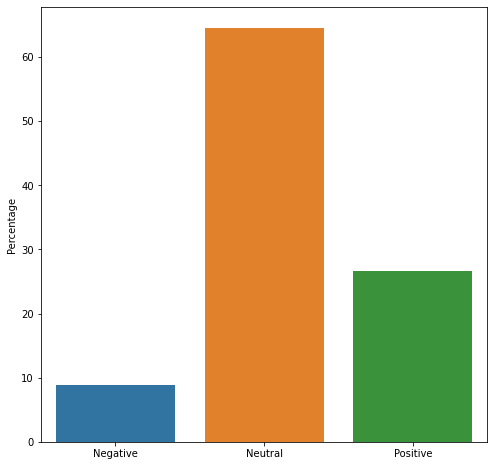

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

## Data Cleaning 

### Looking For Duplicates using `.duplicated()` function and `.any()` to return bool if any

In [36]:
dups = merged_df.duplicated()
print(dups.any())
print(merged_df[dups])

False
Empty DataFrame
Columns: [Date, Time, date, Close/Last, Volume, Open, High, Low, search, rolling_avg, title, upvote_ratio, score, num_comments]
Index: []


### Checking for NA values in the Dataframe using `.isna()`

In [37]:
merged_df.isna().any()


Date            False
Time            False
date            False
Close/Last      False
Volume          False
Open            False
High            False
Low             False
search          False
rolling_avg     False
title           False
upvote_ratio    False
score           False
num_comments    False
dtype: bool

### Checking for unique values using `.nunique()` and Dropping the columns which have Zero unique values 

In [38]:
merged_df.nunique()


Date            102
Time            162
date            102
Close/Last      101
Volume          102
Open            100
High            100
Low             100
search           23
rolling_avg      57
title           162
upvote_ratio     22
score            81
num_comments     32
dtype: int64

## Data Scaling

In [39]:
from sklearn import preprocessing
from sklearn import impute


### 1. Dropping columns with `str` values to perform scaling
### 2. Removing $ from certain columns to make them numeric using `.replace()`

In [40]:
scaled_df=merged_df.drop(['title','date','Time','Date'],axis=1)
cols = ['Close/Last','Open','High','Low']
scaled_df[cols]=scaled_df[cols].replace({'\$':''},regex=True)
scaled_df

,Close/Last,Volume,Open,High,Low,search,rolling_avg,upvote_ratio,score,num_comments
0,35.54,43007780,37.25,38.26,35.37,7,7.571429,0.80,3.0,5.0
1,40.08,52441280,38.5,40.57,37.74,7,8.000000,1.00,63.0,5.0
2,40.08,52441280,38.5,40.57,37.74,7,8.000000,1.00,2.0,3.0
3,40.29,70807630,41.95,43.3286,38.53,8,8.285714,1.00,12.0,4.0
4,44.2,68730250,46.1,46.38,44.2,10,8.714286,0.96,26.0,7.0
...,...,...,...,...,...,...,...,...,...,...
157,19.9,1253254000,20.34,20.36,11.01,65,13.571429,0.95,112.0,16.0
158,4.96,456850200,5.09,5.19,4.37,9,4.714286,0.96,69.0,10.0
159,4.42,443238100,4.71,4.88,3.85,6,4.000000,0.99,73.0,20.0
160,4.42,443238100,4.71,4.88,3.85,6,4.000000,0.86,10.0,2.0


In [41]:
scaled_df.to_csv("scaled_df.csv")

### scaling using `preprocessing.scale()` function to make sure that the data has mean 0 and variance 1

In [42]:
scaled = preprocessing.scale(scaled_df)
scaled


C:\Users\Bruker\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


array([[ 0.71216902, -0.53017941,  0.85632711, ..., -2.56468389,
        -0.83335431, -0.42110693],
       [ 0.98556378, -0.48349096,  0.93356045, ...,  0.72623722,
         0.44954146, -0.42110693],
       [ 0.98556378, -0.48349096,  0.93356045, ...,  0.72623722,
        -0.85473591, -0.60134292],
       ...,
       [-1.16184964,  1.450648  , -1.15421135, ...,  0.56169117,
         0.66335742,  0.930663  ],
       [-1.16184964,  1.450648  , -1.15421135, ..., -1.57740756,
        -0.68368314, -0.69146092],
       [-1.16184964,  1.450648  , -1.15421135, ...,  0.23259905,
        -0.10638004, -0.78157891]])

## Data Imputation

In [43]:
imp_df = impute.SimpleImputer(missing_values=np.nan, strategy='mean')
imp_df.fit(scaled_df)
print(imp_df.transform(scaled_df))


[[3.554000e+01 4.300778e+07 3.725000e+01 ... 8.000000e-01 3.000000e+00
  5.000000e+00]
 [4.008000e+01 5.244128e+07 3.850000e+01 ... 1.000000e+00 6.300000e+01
  5.000000e+00]
 [4.008000e+01 5.244128e+07 3.850000e+01 ... 1.000000e+00 2.000000e+00
  3.000000e+00]
 ...
 [4.420000e+00 4.432381e+08 4.710000e+00 ... 9.900000e-01 7.300000e+01
  2.000000e+01]
 [4.420000e+00 4.432381e+08 4.710000e+00 ... 8.600000e-01 1.000000e+01
  2.000000e+00]
 [4.420000e+00 4.432381e+08 4.710000e+00 ... 9.700000e-01 3.700000e+01
  1.000000e+00]]


In [44]:
imp_df = impute.SimpleImputer(missing_values=np.nan, strategy='mean')
imp_df.fit(scaled_df)
new_imp = pd.DataFrame(imp_df.transform(scaled_df))
new_imp.columns = scaled_df.columns
print(new_imp)

     Close/Last        Volume   Open     High    Low  search  rolling_avg  \
0         35.54  4.300778e+07  37.25  38.2600  35.37     7.0     7.571429   
1         40.08  5.244128e+07  38.50  40.5700  37.74     7.0     8.000000   
2         40.08  5.244128e+07  38.50  40.5700  37.74     7.0     8.000000   
3         40.29  7.080763e+07  41.95  43.3286  38.53     8.0     8.285714   
4         44.20  6.873025e+07  46.10  46.3800  44.20    10.0     8.714286   
..          ...           ...    ...      ...    ...     ...          ...   
157       19.90  1.253254e+09  20.34  20.3600  11.01    65.0    13.571429   
158        4.96  4.568502e+08   5.09   5.1900   4.37     9.0     4.714286   
159        4.42  4.432381e+08   4.71   4.8800   3.85     6.0     4.000000   
160        4.42  4.432381e+08   4.71   4.8800   3.85     6.0     4.000000   
161        4.42  4.432381e+08   4.71   4.8800   3.85     6.0     4.000000   

     upvote_ratio  score  num_comments  
0            0.80    3.0          

In [46]:
print(merged_df.shape)
merged_df.dropna(axis=0, inplace=True)
print(merged_df.shape)
Amc_Final = merged_df.drop('date',axis=1)
Amc_Final

(162, 14)
(162, 14)


,Date,Time,Close/Last,Volume,Open,High,Low,search,rolling_avg,title,upvote_ratio,score,num_comments
0,2021-09-29,19:58:25,$35.54,43007780,$37.25,$38.26,$35.37,7,7.571429,I6 intake swap,0.80,3.0,5.0
1,2021-09-22,16:35:55,$40.08,52441280,$38.5,$40.57,$37.74,7,8.000000,My 62 Rambler Classic,1.00,63.0,5.0
2,2021-09-22,02:48:29,$40.08,52441280,$38.5,$40.57,$37.74,7,8.000000,71 sst,1.00,2.0,3.0
3,2021-09-20,08:05:19,$40.29,70807630,$41.95,$43.3286,$38.53,8,8.285714,1967 Rambler Rebel SST parts,1.00,12.0,4.0
4,2021-09-17,18:12:56,$44.2,68730250,$46.1,$46.38,$44.2,10,8.714286,How Much AMC Javelin Is Worth ?,0.96,26.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2021-01-27,06:01:49,$19.9,1253254000,$20.34,$20.36,$11.01,65,13.571429,Tired of the stock market posts. Here's my 197...,0.95,112.0,16.0
158,2021-01-26,19:46:57,$4.96,456850200,$5.09,$5.19,$4.37,9,4.714286,Just picked up this 67.,0.96,69.0,10.0
159,2021-01-25,16:03:12,$4.42,443238100,$4.71,$4.88,$3.85,6,4.000000,I wish AMC were still alive today.. Detroit wa...,0.99,73.0,20.0
160,2021-01-25,22:36:52,$4.42,443238100,$4.71,$4.88,$3.85,6,4.000000,Ive found ANOTHER Gremlin. Guy loves AMCs want...,0.86,10.0,2.0


In [47]:
Amc_Final.to_csv("Amc_final_df.csv")


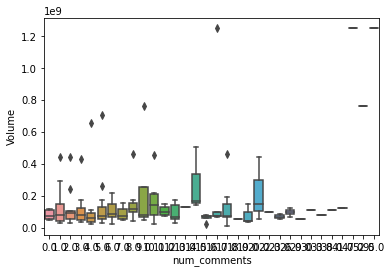

In [48]:
sns.boxplot(data=Amc_Final, x="num_comments", y="Volume")
plt.show()


### Computing `Z-score` to remove Outliers from the dataset

In [49]:
from scipy import stats
Z = stats.zscore(Amc_Final["Volume"],nan_policy="omit") #compute z-score table
print(Z)

0     -0.530179
1     -0.483491
2     -0.483491
3     -0.392592
4     -0.402873
         ...   
157    5.459594
158    1.518017
159    1.450648
160    1.450648
161    1.450648
Name: Volume, Length: 162, dtype: float64


### Checking For Outliers and locating them using `.where()` function 

In [50]:
np.where((Z > 3) | (Z < -3))


(array([ 65,  66, 155, 156, 157], dtype=int64),)

### Dropping rows having Outliers detected above using drop function

In [51]:
Amc_Final = Amc_Final.drop([65,66,155,156,157],axis=0)

In [52]:
Amc_Final.to_csv("Amc_final_df.csv")

## Feature engineering

## Feature Transforms

### Converting Volume Column into log values using `.apply(np.log)`

In [55]:
dfcopy = scaled_df.copy()

In [56]:
dfcopy['Volume'] = dfcopy['Volume'].apply(np.log)

In [57]:
dfcopy

,Close/Last,Volume,Open,High,Low,search,rolling_avg,upvote_ratio,score,num_comments
0,35.54,17.576892,37.25,38.26,35.37,7,7.571429,0.80,3.0,5.0
1,40.08,17.775205,38.5,40.57,37.74,7,8.000000,1.00,63.0,5.0
2,40.08,17.775205,38.5,40.57,37.74,7,8.000000,1.00,2.0,3.0
3,40.29,18.075477,41.95,43.3286,38.53,8,8.285714,1.00,12.0,4.0
4,44.2,18.045700,46.1,46.38,44.2,10,8.714286,0.96,26.0,7.0
...,...,...,...,...,...,...,...,...,...,...
157,19.9,20.949009,20.34,20.36,11.01,65,13.571429,0.95,112.0,16.0
158,4.96,19.939866,5.09,5.19,4.37,9,4.714286,0.96,69.0,10.0
159,4.42,19.909618,4.71,4.88,3.85,6,4.000000,0.99,73.0,20.0
160,4.42,19.909618,4.71,4.88,3.85,6,4.000000,0.86,10.0,2.0


In [67]:
Dota = {'Variables': ['Date', 'Time', 'Close/Last', 'Volume', 'Open', 'High', 'Low', 'Search', 'rolling_avg', 'upvote_ratio', 'score', 'num_comments'], 'Description': ['Dates in yr-m-d format', 'Time in hr:min:sec format', 'Closing price of the stock on that day', 'Volume of Stock traded in a Day', 'Opening price of Stock on that day', 'peak value of the stock on that day', 'Lowest price of the stock on that day', 'Daily Search Hits','The average search per day', 'percentage of upvotes on reddit', 'the number of upvotes minus the number of downvotes', 'number of comments on the post'], 'Unit': ['yr-m-d format', 'hr:min:sec format', '$', 'volume traded in millions', '$', '$', '$', 'number of searches in 10s', 'float values', 'percentage', 'Difference of upvote and downvote in integer', 'Number of comments in integer']}


In [68]:
Lexicon1 = pd.DataFrame(Dota)
Lexicon1.to_csv("Lexicon1.csv")
Lexicon1

,Variables,Description,Unit
0,Date,Dates in yr-m-d format,yr-m-d format
1,Time,Time in hr:min:sec format,hr:min:sec format
2,Close/Last,Closing price of the stock on that day,$
3,Volume,Volume of Stock traded in a Day,volume traded in millions
4,Open,Opening price of Stock on that day,$
5,High,peak value of the stock on that day,$
6,Low,Lowest price of the stock on that day,$
7,Search,Daily Search Hits,number of searches in 10s
8,rolling_avg,The average search per day,float values
9,upvote_ratio,percentage of upvotes on reddit,percentage


In [69]:
scaled_df = pd.read_csv("scaled_df.csv")
df_mean = scaled_df[["Close/Last","search","rolling_avg","upvote_ratio","score","num_comments"]].mean()

In [70]:
dsf = pd.DataFrame(df_mean)
dsf


,0
Close/Last,23.713704
search,13.567901
rolling_avg,12.236332
upvote_ratio,0.955864
score,41.975309
num_comments,9.672840


In [73]:
hsf = pd.DataFrame(scaled_df[["Close/Last", "Volume", "search", "rolling_avg", "upvote_ratio", "score", "num_comments"]].median())


In [74]:
asf = pd.DataFrame(scaled_df[["Close/Last", "Volume", "search","rolling_avg", "upvote_ratio", "score", "num_comments"]].std())

asf


,0
Close/Last,1.665752e+01
Volume,2.026786e+08
search,1.161969e+01
rolling_avg,8.772737e+00
upvote_ratio,6.096170e-02
score,4.691421e+01
num_comments,1.113097e+01


In [75]:
min = pd.DataFrame(scaled_df[["Close/Last", "Volume", "search", "rolling_avg","upvote_ratio", "score", "num_comments"]].min())
min

,0
Close/Last,4.42
Volume,15834150.00
search,6.00
rolling_avg,4.00
upvote_ratio,0.71
score,1.00
num_comments,0.00


In [76]:
max = pd.DataFrame(scaled_df[["Close/Last", "Volume", "search","rolling_avg", "upvote_ratio", "score", "num_comments"]].max())


In [77]:
Lexicon2 = [dsf,hsf,asf,min,max]

In [78]:
df_merged = pd.concat([dsf,hsf,asf,min,max], axis=1)


In [79]:
df_merged.columns = ['Mean', 'Median', 'Std', 'Min','Max']
df_merged.to_csv("Lexicon2.csv")

# Summary statistics & visualizations

### Removing outliers from dataframe before running the regression analysis

In [117]:
dfcopy = scaled_df.copy()

In [118]:
dfcopy['Volume'] = dfcopy['Volume'].apply(np.log)
dfcopy =dfcopy.drop([65, 66, 155, 156, 157], axis=0)

In [119]:
dfcopy =dfcopy.iloc[:, 1:]

In [121]:
dfcopy.drop(['Open', 'High', 'Low'], axis=1, inplace=True)

In [122]:
dfcopy.head()

,Close/Last,Volume,search,rolling_avg,upvote_ratio,score,num_comments
0,35.54,17.576892,7,7.571429,0.80,3.0,5.0
1,40.08,17.775205,7,8.000000,1.00,63.0,5.0
2,40.08,17.775205,7,8.000000,1.00,2.0,3.0
3,40.29,18.075477,8,8.285714,1.00,12.0,4.0
4,44.20,18.045700,10,8.714286,0.96,26.0,7.0


In [123]:
summary_stats = dfcopy.describe()
print(summary_stats)

       Close/Last      Volume      search  rolling_avg  upvote_ratio  \
count  157.000000  157.000000  157.000000   157.000000    157.000000   
mean    23.291847   18.330344   11.942675    11.979072      0.955732   
std     16.326995    0.710446    7.294397     8.665084      0.061844   
min      4.420000   16.577680    6.000000     4.000000      0.710000   
25%      9.420000   17.839440    8.000000     8.285714      0.940000   
50%     13.560000   18.253836   10.000000    10.285714      0.980000   
75%     38.130000   18.741537   12.000000    11.714286      1.000000   
max     59.260000   20.374482   51.000000    55.142857      1.000000   

            score  num_comments  
count  157.000000    157.000000  
mean    37.738854      8.585987  
std     33.407190      7.702850  
min      1.000000      0.000000  
25%     12.000000      3.000000  
50%     28.000000      6.000000  
75%     52.000000     12.000000  
max    203.000000     41.000000  


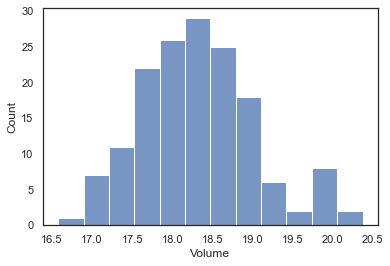

In [156]:
sns.histplot(dfcopy["Volume"],kde=False)
plt.show()

### Next, we plot a correlation matrix 

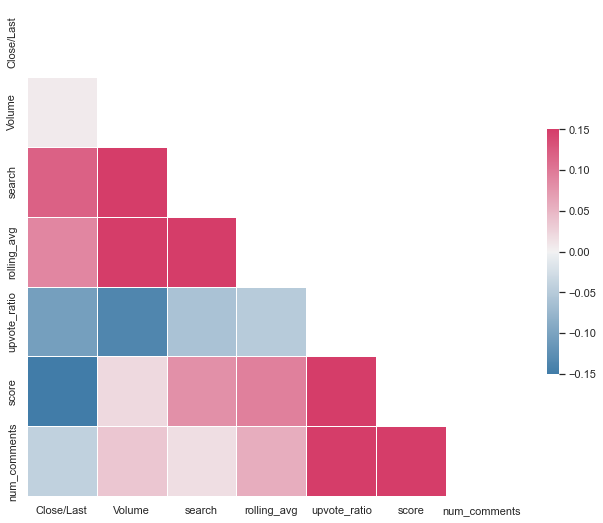

In [136]:
plot_corr(dfcopy.corr(method='pearson', min_periods=1))

In [155]:
X = df[['search', 'upvote_ratio', 'score', 'num_comments']]
Y = df[['Volume']]
X = sm.add_constant(X)
lm = sm.OLS(Y, X).fit()
print(lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     126.3
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           5.24e-48
Time:                        03:37:42   Log-Likelihood:                -3211.4
No. Observations:                 162   AIC:                             6433.
Df Residuals:                     157   BIC:                             6448.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.799e+08    1.3e+08      1.385   

In [159]:
X = df[['search', 'upvote_ratio', 'score']]
Y = df[['Volume']]
X = sm.add_constant(X)
lm = sm.OLS(Y, X).fit()
print(lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     168.9
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           4.42e-49
Time:                        06:03:23   Log-Likelihood:                -3211.6
No. Observations:                 162   AIC:                             6431.
Df Residuals:                     158   BIC:                             6443.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          1.88e+08   1.29e+08      1.458   